In [13]:
from MHW_daily_calcs import *
import matplotlib.pyplot as plt

In [2]:
test=xr.open_mfdataset('/space/hall5/sitestore/eccc/crd/ccrn/users/reo000/work/MHW_daily/byLead/anomByLead_cwao_CanESM5.1p1bc-v20240611_hindcast_C1993_2023_L000_j000_ocean_1d_surface_tso.nc',
                      parallel=True)

In [3]:
test

<xarray.Dataset> Size: 1GB
Dimensions:   (reftime: 378, r: 20, lat: 60, lon: 360)
Coordinates:
  * lat       (lat) float64 480B -89.5 -88.5 -87.5 -86.5 ... -32.5 -31.5 -30.5
    leadtime  timedelta64[ns] 8B ...
  * lon       (lon) float64 3kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * reftime   (reftime) datetime64[ns] 3kB 1993-01-01 1993-02-01 ... 2024-06-01
  * r         (r) int64 160B 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19
Data variables:
    sst_an    (reftime, r, lat, lon) float64 1GB dask.array<chunksize=(378, 20, 60, 360), meta=np.ndarray>
    time      (reftime) datetime64[ns] 3kB dask.array<chunksize=(378,), meta=np.ndarray>

In [4]:
test.sst_an

<xarray.DataArray 'sst_an' (reftime: 378, r: 20, lat: 60, lon: 360)> Size: 1GB
dask.array<open_dataset-sst_an, shape=(378, 20, 60, 360), dtype=float64, chunksize=(378, 20, 60, 360), chunktype=numpy.ndarray>
Coordinates:
  * lat       (lat) float64 480B -89.5 -88.5 -87.5 -86.5 ... -32.5 -31.5 -30.5
    leadtime  timedelta64[ns] 8B ...
  * lon       (lon) float64 3kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * reftime   (reftime) datetime64[ns] 3kB 1993-01-01 1993-02-01 ... 2024-06-01
  * r         (r) int64 160B 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19

In [5]:
climyrs=[1993,2023]
ilead=26
jj=0
qtile=0.9
detr=False
smoothedClim=False
smoothedTrend=False
smoothmethod=None
window=0
delt=30

#calc_quantile_CanESM30(climyrs,ilead,jj,qtile,detr,smoothedClim,smoothedTrend,smoothmethod,window,delt)

In [6]:
    lmax=215
    def getind(i0):
        if i0>=1 and i0<=10:
            return [i0-1,i0,i0+1]
        elif i0==0:
            return [11,0,1]
        elif i0==11:
            return [10,11,0]
    def leadbounds(l0,lmax,delt):
        return max(0,l0-delt), min(lmax,l0+delt+1)
    if detr:
        flist=[fnameCanESMAnomDetrByLead(workdir, climyrs[0],climyrs[-1],il,jj,smoothClim=smoothedClim,smoothTrend=smoothedTrend,meth=smoothmethod,win=window) \
                for il in range(*leadbounds(ilead,215,delt))]
    else:
        flist=[fnameCanESMAnomByLeadNoDetr(workdir, climyrs[0], climyrs[-1], il, jj,smoothClim=smoothedClim,meth=smoothmethod,win=window) \
                for il in range(*leadbounds(ilead,215,delt))]
    fqout=fnameCanESMAnomQtile(workdir, climyrs[0], climyrs[-1], ilead, jj, qtile, detr,
                               smoothClim=smoothedClim,smoothTrend=smoothedTrend,meth=smoothmethod,win=window,delt=delt)
    #print(flist,flush=True)
    ff=xr.open_mfdataset(flist,combine='nested',concat_dim=['leadtime'],parallel=True,decode_times=False)

In [7]:
ff.sst_an

<xarray.DataArray 'sst_an' (leadtime: 57, reftime: 378, r: 20, lat: 60, lon: 360)> Size: 74GB
dask.array<concatenate, shape=(57, 378, 20, 60, 360), dtype=float64, chunksize=(1, 378, 20, 60, 360), chunktype=numpy.ndarray>
Coordinates:
  * lat       (lat) float64 480B -89.5 -88.5 -87.5 -86.5 ... -32.5 -31.5 -30.5
  * leadtime  (leadtime) float64 456B 15.0 39.0 63.0 ... 1.335e+03 1.359e+03
  * lon       (lon) float64 3kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * reftime   (reftime) int64 3kB 0 31 59 90 120 ... 11382 11413 11443 11474
  * r         (r) int64 160B 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19

In [8]:
    fc=ff.sst_an.coarsen(reftime=12,boundary='pad').construct(reftime=('year','month'))
    fc=fc.chunk({'lat':10,'lon':10})
    sh=fc.shape
    ql1=np.nan*np.ones((12,sh[-2],sh[-1]))
    ql2=np.nan*np.ones((12,sh[-2],sh[-1]))

In [9]:
fc

<xarray.DataArray 'sst_an' (leadtime: 57, year: 32, month: 12, r: 20, lat: 60,
                            lon: 360)> Size: 76GB
dask.array<rechunk-merge, shape=(57, 32, 12, 20, 60, 360), dtype=float64, chunksize=(1, 31, 12, 20, 10, 10), chunktype=numpy.ndarray>
Coordinates:
  * lat       (lat) float64 480B -89.5 -88.5 -87.5 -86.5 ... -32.5 -31.5 -30.5
  * leadtime  (leadtime) float64 456B 15.0 39.0 63.0 ... 1.335e+03 1.359e+03
  * lon       (lon) float64 3kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
    reftime   (year, month) float64 3kB dask.array<chunksize=(32, 12), meta=np.ndarray>
  * r         (r) int64 160B 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19
Dimensions without coordinates: year, month

In [10]:
t=dt.datetime.now()
ii=0
gr=7
for ij in range(0,int(np.ceil(sh[-2]/gr))):
    pool1=fc.isel(month=ii,lat=slice(ij,ij+gr)).data.reshape((sh[0]*sh[1]*sh[3],gr,sh[5]))
    ql1[ii,ij:ij+gr,:]=da.apply_along_axis(np.quantile,0,pool1,qtile).compute()
    pool2=fc.sel(month=getind(ii)).isel(lat=slice(ij,ij+gr)).data.reshape((sh[0]*sh[1]*3*sh[3],gr,sh[5]))
    ql2[ii,ij:ij+gr,:]=da.apply_along_axis(np.quantile,0,pool2,qtile).compute()
print(dt.datetime.now()-t)

0:08:19.329681


In [16]:
t=dt.datetime.now()
ii=0
gr=20
for ij in range(0,int(np.ceil(sh[-2]/gr))):
    pool1=fc.isel(month=ii,lat=slice(ij*gr,(ij+1)*gr)).data.reshape((sh[0]*sh[1]*sh[3],gr,sh[5]))
    ql1[ii,ij*gr:(ij+1)*gr,:]=da.apply_along_axis(np.quantile,0,pool1,qtile).compute()
    #pool2=fc.sel(month=getind(ii)).isel(lat=slice(ij*gr,(ij+1)*gr)).data.reshape((sh[0]*sh[1]*3*sh[3],gr,sh[5]))
    #ql2[ii,ij*gr:(ij+1)*gr,:]=da.apply_along_axis(np.quantile,0,pool2,qtile).compute()
print(dt.datetime.now()-t)

0:03:33.312113


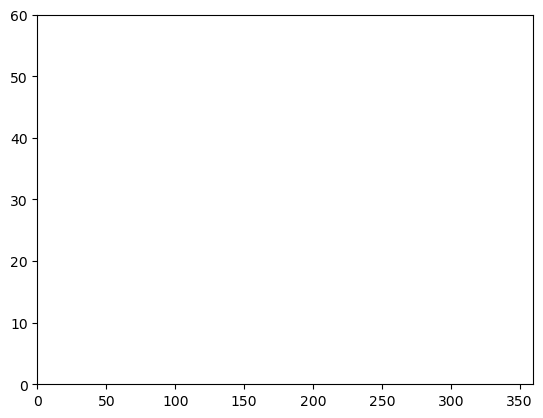

In [18]:
plt.pcolormesh(ql2[0,:,:])